# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [6]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

ModuleNotFoundError: No module named 'dotenv'

In [ ]:
# Load the environment variables from the .env file
#by calling the load_dotenv function

#loads our environment files
load_dotenv()

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [ ]:
# The current number of coins for each cryptocurrency asset held in the portfolio.

#sets two variables holding float values representing the amount of cryptocurrency held in each currency
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [ ]:
# The monthly amount for the member's household income

#creates a new variable to hold monthly income
monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [ ]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets

#creates two variables to hold the URL to the API for BTC and ETH
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [ ]:
# Using the Python requests library, make an API call to access the current price of BTC

#Creates a variable to hold the data acquired using the requests.get function from the BTC API. Also uses .json function to make it readable
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# YOUR CODE HERE

#prints out the results of our API call using the json.dumps function to format the data into a more readable format
print(json.dumps(btc_response, indent = 4 ,sort_keys = True))

In [ ]:
# Using the Python requests library, make an API call to access the current price ETH

#Creates a variable to hold the data acquired using the requests.get function from the ETH API. Also uses .json function to make it readable
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# YOUR CODE HERE

#prints out the results of our API call using the json.dumps function to format the data into a more readable format
print(json.dumps(eth_response, indent = 4 ,sort_keys = True))

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [ ]:
# Navigate the BTC response object to access the current price of BTC

#Extracts the BTC price by going thru the different levels of dictionary in our btc_response
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]
# Print the current price of BTC
# YOUR CODE HERE

#prints the current value of Bitcoin using data from our API call
print(f"The  price of Bitcoin (BTC) is: ${btc_price} right now")

In [ ]:
# Navigate the BTC response object to access the current price of ETH

#Extracts the BTC price by going thru the different levels of dictionary in our eth_response
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

# Print the current price of ETH
# YOUR CODE HERE

#prints the current value of Ethereum using data from our API call
print(f"The  price of Ethereum (ETH) is: ${eth_price} right now")

### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [ ]:
# Compute the current value of the BTC holding 

#Computes the total value of bitcoins held by multiplying the price times the amount held, proceeds to store it in a variable
btc_value = btc_price * btc_coins

# Print current value of your holding in BTC
# YOUR CODE HERE

#prints the total value of Bitcoins held
print(f"The current value of your {btc_coins} BTC is: ${btc_value:.02f}")

In [ ]:
# Compute the current value of the ETH holding 

#Computes the total value of ethereums held by multiplying the price times the amount held, proceeds to store it in a variable
eth_value = eth_price * eth_coins

# Print current value of your holding in ETH
# YOUR CODE HERE

#prints the total value of Ethereums held
print(f"The current value of your {eth_coins} ETH is: ${eth_value:.02f}")

In [ ]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
# YOUR CODE HERE

#prints the total value of cryptocurrencies held
print(f"The total value of your cryptocurrencies holding is: ${total_crypto_wallet:.02f}")

### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [ ]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.

#Stores the amount of SPY and AGG shares held in a variable holding an integer
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [ ]:
# Set the variables for the Alpaca API and secret keys

#Retrieves the Alpaca API Key and Secret Key from our .env file using the os.getenv function
ALPACA_API_KEY = os.getenv("ALPACA_API_KEY")
ALPACA_SECRET_KEY = os.getenv("ALPACA_SECRET_KEY")

#displays the type for both the API Key and the Secret Key to make sure they were properly imported
display(type(ALPACA_API_KEY))
display(type(ALPACA_SECRET_KEY))

# Create the Alpaca tradeapi.REST object

#creates and Alpca tradeapi.REST object with our keys as parameters + the API version we are using
alpaca = tradeapi.REST( ALPACA_API_KEY, ALPACA_SECRET_KEY, api_version="v2")


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [2]:
# Set the tickers for both the bond and stock portion of the portfolio
# YOUR CODE HERE

#Creates a list of the tickers to be used and stores them in a variable
tickers = ["SPY","AGG"]

# Set timeframe to 1D 
# YOUR CODE HERE

#Creates a variable to hold the desired Timeframe
timeframe = "1D"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
# YOUR CODE HERE
# YOUR CODE HERE

#Creates a variable to hold the desired start date using the pd.Timestamp function and the .isoformat function to make it readably by our API call
start_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()

#Creates a variable to hold the desired end date using the pd.Timestamp function and the .isoformat function to make it readably by our API call
end_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()



#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

In [3]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
# YOUR CODE HERE

#creates a DataFrame using the values called from our API using the alpaca.get_barset function
df_portfolio = alpaca.get_barset(
tickers,
timeframe,
start = start_date,
end = end_date
).df

# Review the first 5 rows of the Alpaca DataFrame
# YOUR CODE HERE

#prints the first five rows of our DataFrame, in this case only one because we are only analyzing data for one day
df_portfolio.head()

NameError: name 'alpaca' is not defined

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [4]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number

#Navigates the DataFrame to find the closing price for AGG and stores it in a variable 
agg_close_price = df_portfolio["AGG"]["close"][0]

# Print the AGG closing price
# YOUR CODE HERE

#Prints the closing price for AGG for the specified date
print(f"The price for AGG is ${agg_close_price:.02f}")


NameError: name 'df_portfolio' is not defined

In [5]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number

#Navigates the DataFrame to find the closing price for SPY and stores it in a variable 
spy_close_price = df_portfolio["SPY"]["close"][0]

# Print the SPY closing price
# YOUR CODE HERE

#Prints the closing price for SPY for the specified date
print(f"The price for SPY is ${spy_close_price:.02f}")

NameError: name 'df_portfolio' is not defined

#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [78]:
# Calculate the current value of the bond portion of the portfolio

#Calculates the value of the AGG holding by multiplying the shares held by the close price
agg_value = agg_shares * agg_close_price

# Print the current value of the bond portfolio
# YOUR CODE HERE

#Prints the total value of AGG shares held for the specified date
print(f"The net value of AGG holdings is ${agg_value:.02f}")

The total value of AGG holdings is $23889.00


In [79]:
# Calculate the current value of the stock portion of the portfolio

#Calculates the value of the SPY holding by multiplying the shares held by the close price
spy_value = spy_shares * spy_close_price

# Print the current value of the stock portfolio
# YOUR CODE HERE

#Prints the total value of SPY shares held for the specified date
print(f"The net value of SPY holdings is ${spy_value:.02f}")

The total value of SPY holdings is $36800.50


In [80]:
# Calculate the total value of the stock and bond portion of the portfolio

#Calculates the total value of stocks(SPY) and bonds(AGG) held by adding their total values and storing it in a variable
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
# YOUR CODE HERE

#Prints the total value of stocks and bonds held for the specified date
print(f"The net value of the stock/bond portfolio is ${total_stocks_bonds:.02f}")

The total value of the stock/bond portfolio is $60689.50


In [81]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds

#Adds the total values of stocks/bond held and cryptos held and stores it in a variable
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print total balance
# YOUR CODE HERE

#Prints out the total value of the stocks/bonds and crypto held 
print(f"The net value of the stock/bond and crypto portfolio is ${total_portfolio:.02f}")

The total value of the stock/bond and crypto portfolio is $117277.64


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [82]:
# Consolidate financial assets data into a Python list
# YOUR CODE HERE

#Creates a new list holding the crypto holdings and the stock/bonds holdings
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
# YOUR CODE HERE

#Prints out our list
savings_data
    

[56588.143, 60689.5]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [83]:
# Create a Pandas DataFrame called savings_df 
# YOUR CODE HERE

#Creates a new DataFrame using the previously created list (savings_data) and sets a specific indexes and columns for better formatting and recognition
savings_df = pd.DataFrame(savings_data, columns = ["amount"], index = ["crypto","stock/bond"])

# Display the savings_df DataFrame
# YOUR CODE HERE

#Prints out the created DataFrame
savings_df

,amount
crypto,56588.143
stock/bond,60689.500


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Portfolio Weights'}, ylabel='amount'>

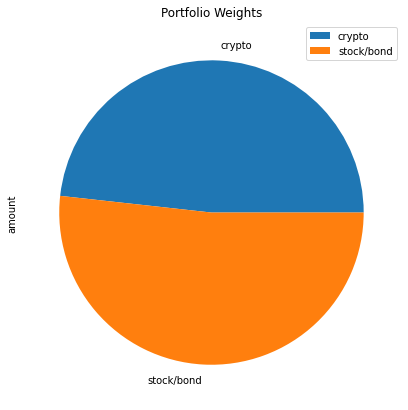

In [84]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
# YOUR CODE HERE

#Plots a pie chart of our "savings_df" DataFrame with a custom title and size
savings_df.plot(kind = "pie", y = "amount", title = "Portfolio Weights", figsize = (7,7))

#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [85]:
# Create a variable named emergency_fund_value
# YOUR CODE HERE

#Creates a new variable to hold the desired emergency fund value which is calculated by multiplying the monthly income by three
emergency_fund_value = (monthly_income * 3)

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [86]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:

#Creates and if/elif/else function which evaluates the emergency_fund value and compares it to the total portfolio. It goes on to print three differerent responses for ocassions when portfolio is greater, equal and lower than the emergeny fund desired value
if total_portfolio > emergency_fund_value:
    print("You have enough money in your emergency fund!")
elif total_portfolio == emergency_fund_value:
    print("You have the minimum necessary for your emergency fund!")
else:
    print(f"You have not met you minimum for you emergency fund, the minimum amount neede to get to a safe emergency fund is ${total_portfolio - emergency_fund_value}")


Congratulations, you have enough money in your emergency fund!


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [87]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date

#Creates a variable to hold the desired start date using the pd.Timestamp function and the .isoformat function to make it readably by our API call
start_date = pd.Timestamp("2017-08-07", tz="America/New_York").isoformat()

#Creates a variable to hold the desired end date using the pd.Timestamp function and the .isoformat function to make it readably by our API call
end_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()

# Set number of rows to 1000 to retrieve the maximum amount of rows

#Sets the limit amount of rows that we will get from our API Call
rows = 1000

In [88]:
# Use the Alpaca get_barset function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame

#Creates a DataFrame using the information gathered from our API call
portfolio_2_df = alpaca.get_barset(
tickers,
timeframe,
start = start_date,
end = end_date,
limit = rows
).df


# Display both the first and last five rows of the DataFrame

#Displays the first five rows of our DataFrame
display(portfolio_2_df.head())

#Displays the last five rows of our DataFrame
display(portfolio_2_df.tail())


AGG                                         \
                             open    high       low     close     volume   
time                                                                       
2017-08-07 00:00:00-04:00  109.69  109.72  109.6066  109.6850  1425317.0   
2017-08-08 00:00:00-04:00  109.67  109.69  109.5000  109.5810  1998999.0   
2017-08-09 00:00:00-04:00  109.87  109.87  109.6600  109.6700  2069028.0   
2017-08-10 00:00:00-04:00  109.70  109.85  109.6700  109.8053  1691677.0   
2017-08-11 00:00:00-04:00  109.75  109.94  109.6800  109.8850  1613467.0   

                              SPY                                     
                             open    high     low    close    volume  
time                                                                  
2017-08-07 00:00:00-04:00  247.49  247.87  247.37  247.850  20901988  
2017-08-08 00:00:00-04:00  247.51  248.91  246.83  247.291  44619069  
2017-08-09 00:00:00-04:00  246.47  247.31  246.06  247.230  48543032  
2017-08-10 00:00:00-04:00  246.28  246.44  243.70  243.790  87857827  
2017-08-11 00:00:00-04:00  244.02  244.80  243.75  244.110  56404847

AGG                                         \
                             open    high       low    close      volume   
time                                                                       
2020-08-03 00:00:00-04:00  119.37  119.40  119.1903  119.400  17837420.0   
2020-08-04 00:00:00-04:00  119.42  119.63  119.4200  119.630  21512268.0   
2020-08-05 00:00:00-04:00  119.39  119.49  119.3100  119.400  34175883.0   
2020-08-06 00:00:00-04:00  119.62  119.73  119.5300  119.580   9009216.0   
2020-08-07 00:00:00-04:00  119.66  119.73  119.3950  119.445   8830420.0   

                                SPY                                    
                               open    high     low   close    volume  
time                                                                   
2020-08-03 00:00:00-04:00  328.3200  329.62  327.73  328.76  71741125  
2020-08-04 00:00:00-04:00  327.8600  330.06  327.86  330.03  73684427  
2020-08-05 00:00:00-04:00  331.4700  332.39  331.18  332.06  72846458  
2020-08-06 00:00:00-04:00  331.4799  334.46  331.13  334.31  76900649  
2020-08-07 00:00:00-04:00  333.2800  334.88  332.30  334.55  98710236

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [90]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
# YOUR CODE HERE

#sets the weights for each holding 40% AGG and 60% SPY for our Monte Carlo simulation
weights = [.60 , .40]

#Sets the number of simulations to be run by our Monte Carlo Simulation
num_simulation = 500

#Sets the number of trading days which equals to the number of trading days in a year times our forecast (30 years)
num_trading_days = 252 * 30

# Review the simulation input data
print("Input Data")
print("")

#Prints out the weights
print("weights")
print(weights)

#Prints out the number of simulations
print("number of simulations")
print(num_simulation)

#Prints out the number of trading days
print("number of trading days")
print(num_trading_days)


Input Data

weights
[0.6, 0.4]
number of simulations
500
number of trading days
7560


In [91]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE

#Runs a Monte Carlo Simulation with the desired parameters
mc_portfolio_2_30_year = MCSimulation(
  portfolio_data = portfolio_2_df,
  weights = weights,
  num_simulation = num_simulation,
  num_trading_days = num_trading_days
)

#Prints out the first five results of our simulation using the .portfolio_data and .head functions
mc_portfolio_2_30_year.portfolio_data.head()

AGG                                         \
                             open    high       low     close     volume   
time                                                                       
2017-08-07 00:00:00-04:00  109.69  109.72  109.6066  109.6850  1425317.0   
2017-08-08 00:00:00-04:00  109.67  109.69  109.5000  109.5810  1998999.0   
2017-08-09 00:00:00-04:00  109.87  109.87  109.6600  109.6700  2069028.0   
2017-08-10 00:00:00-04:00  109.70  109.85  109.6700  109.8053  1691677.0   
2017-08-11 00:00:00-04:00  109.75  109.94  109.6800  109.8850  1613467.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-08-07 00:00:00-04:00          NaN  247.49  247.87  247.37  247.850   
2017-08-08 00:00:00-04:00    -0.000948  247.51  248.91  246.83  247.291   
2017-08-09 00:00:00-04:00     0.000812  246.47  247.31  246.06  247.230   
2017-08-10 00:00:00-04:00     0.001234  246.28  246.44  243.70  243.790   
2017-08-11 00:00:00-04:00     0.000726  244.02  244.80  243.75  244.110   

                                                  
                             volume daily_return  
time                                              
2017-08-07 00:00:00-04:00  20901988          NaN  
2017-08-08 00:00:00-04:00  44619069    -0.002255  
2017-08-09 00:00:00-04:00  48543032    -0.000247  
2017-08-10 00:00:00-04:00  87857827    -0.013914  
2017-08-11 00:00:00-04:00  56404847     0.001313

In [32]:
#Calculates the cumulative returns for our 30 year Monte Carlo Simulation
mc_portfolio_2_30_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\EdgarPocaterra-Susma\Desktop\Columbia University Bootcamp\Challenges\Fifth Challenge\Starter_Code-1\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004070,0.999025,0.994472,0.992501,1.013668,1.000432,1.008857,0.997136,0.992419,1.000831,...,1.000525,0.998069,0.999701,1.007809,1.005565,0.999029,0.992135,1.008321,1.000636,0.989787
2,1.002215,0.986445,0.990893,0.992739,1.008324,0.989459,1.013006,1.009145,0.990163,1.012815,...,1.010859,0.999580,0.994319,1.007556,1.001445,0.994752,0.993955,1.015141,1.008233,0.987695
3,0.995626,0.987354,0.991249,0.990451,1.014804,0.982651,1.012548,1.008973,0.995913,1.012757,...,1.022641,1.006144,0.997312,1.006293,0.996897,1.004119,0.996419,1.015362,1.005706,0.994774
4,0.981684,0.982183,1.001368,0.987590,1.000507,0.982885,1.009997,1.009981,1.001057,1.008185,...,1.017360,1.006842,0.995069,1.005920,0.995900,0.993071,0.996565,1.010766,1.004771,0.987333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,11.997706,8.847586,3.589834,2.192900,13.334531,13.103560,5.334122,5.199038,11.017744,7.133960,...,6.909080,10.901765,9.601814,7.039033,16.294802,12.935080,7.312297,2.496203,4.531068,5.199470
7557,12.123923,8.862083,3.590821,2.181891,13.331702,13.119586,5.322568,5.198235,11.077042,7.102133,...,6.889091,10.891264,9.532696,7.061220,16.334375,12.884852,7.382632,2.494524,4.501477,5.209125
7558,12.204796,8.842958,3.590832,2.169091,13.224650,13.266846,5.307107,5.177182,11.143654,7.116549,...,6.895887,10.803361,9.591605,7.153047,16.072753,13.060110,7.376418,2.481528,4.489041,5.223783
7559,12.131955,8.897564,3.574729,2.160213,13.178120,13.364418,5.313176,5.184975,11.064187,7.120487,...,6.872616,10.897350,9.689283,7.100640,16.108784,13.081814,7.339142,2.509712,4.522832,5.247883


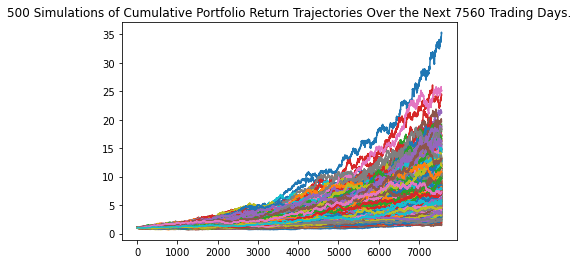

In [34]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE

#Creates an overlayed lineplot showing the 500 different potential returns gathered during our simulation
mc_portfolio_2_30_year_plot = mc_portfolio_2_30_year.plot_simulation()

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\EdgarPocaterra-Susma\Desktop\Columbia University Bootcamp\Challenges\Fifth Challenge\Starter_Code-1\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

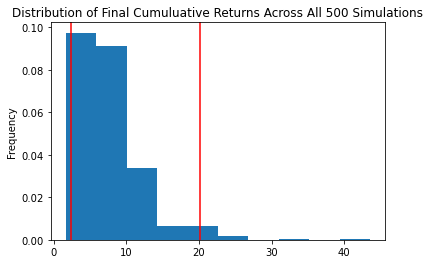

In [92]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE

#Plots a probability distribution chart of our thirty year Monte Carlo simulation
mc_portfolio_2_30_year_probability = mc_portfolio_2_30_year.plot_distribution()

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [95]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE

#Creates summary statistics for our 30 year Monte Carlo simulation
mc_portfolio_2_30_year_probability_summary = mc_portfolio_2_30_year.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
# YOUR CODE HERE

#Prints out out the 30 Year simulation Summary Statistics
print("30 Year Simulation Summary Statistics")
print("")
display(mc_portfolio_2_30_year_probability_summary)

30 Year Simulation Summary Statistics



count           500.000000
mean              7.599075
std               4.625946
min               1.688506
25%               4.558829
50%               6.507121
75%               9.134295
max              43.548234
95% CI Lower      2.377667
95% CI Upper     20.149754
Name: 7560, dtype: float64

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [37]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE

#Prints out our savings DataFrame
savings_df

,amount
crypto,56615.405
stock/bond,60689.500


In [96]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio

#Calculates the cumulative returns lower confidence interval by multiplying our stocks/bonds current amount by the 95% percent lower confidence level calculated in summary statistics
ci_lower_thirty_cumulative_return = savings_df.iloc[1]["amount"] * mc_portfolio_2_30_year_probability_summary["95% CI Lower"]

#Calculates the cumulative returns upper confidence interval by multiplying our stocks/bonds current amount by the 95% percent upper confidence level calculated in summary statistics
ci_upper_thirty_cumulative_return = savings_df.iloc[1]["amount"] * mc_portfolio_2_30_year_probability_summary["95% CI Upper"]

# Print the result of your calculations
# YOUR CODE HERE

#prints out our lower and upper 95% confidence levels
print(f"After thirty years of investment we  expect the stock/bond portfolio to fall between ${ci_lower_thirty_cumulative_return:.02f} and ${ci_upper_thirty_cumulative_return:.02f} with a 95% confidence")

After thirty years of investment we can expect the stock/bond portfolio to fall between $144299.43 and $1222878.48 with a 95% confidence


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [97]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
# YOUR CODE HERE

#Creates two new variables to hold weight and number of trading days since we will be using different ones than the ones in the previous simulation
weights_2 = [.80,.20]
num_trading_days_2 = 252 * 10


# Review the simulation input data
# YOUR CODE HERE

#Prints out the weights
print(weights_2)

#Prints out the number of simulations
print(num_simulation)

#Prints out the number of trading days
print(num_trading_days)


[0.8, 0.2]
500
7560


In [98]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE

#Runs a Monte Carlo Simulation with the desired parameters
mc_portfolio_2_10_year = MCSimulation(
  portfolio_data = portfolio_2_df,
  weights = weights_2,
  num_simulation = num_simulation,
  num_trading_days = num_trading_days_2
)

#Prints out the first five results of our simulation using the .portfolio_data and .head functions
mc_portfolio_2_10_year.portfolio_data.head()

AGG                                         \
                             open    high       low     close     volume   
time                                                                       
2017-08-07 00:00:00-04:00  109.69  109.72  109.6066  109.6850  1425317.0   
2017-08-08 00:00:00-04:00  109.67  109.69  109.5000  109.5810  1998999.0   
2017-08-09 00:00:00-04:00  109.87  109.87  109.6600  109.6700  2069028.0   
2017-08-10 00:00:00-04:00  109.70  109.85  109.6700  109.8053  1691677.0   
2017-08-11 00:00:00-04:00  109.75  109.94  109.6800  109.8850  1613467.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-08-07 00:00:00-04:00          NaN  247.49  247.87  247.37  247.850   
2017-08-08 00:00:00-04:00    -0.000948  247.51  248.91  246.83  247.291   
2017-08-09 00:00:00-04:00     0.000812  246.47  247.31  246.06  247.230   
2017-08-10 00:00:00-04:00     0.001234  246.28  246.44  243.70  243.790   
2017-08-11 00:00:00-04:00     0.000726  244.02  244.80  243.75  244.110   

                                                  
                             volume daily_return  
time                                              
2017-08-07 00:00:00-04:00  20901988          NaN  
2017-08-08 00:00:00-04:00  44619069    -0.002255  
2017-08-09 00:00:00-04:00  48543032    -0.000247  
2017-08-10 00:00:00-04:00  87857827    -0.013914  
2017-08-11 00:00:00-04:00  56404847     0.001313

In [99]:
#Calculates the cumulative returns for our 30 year Monte Carlo Simulation
mc_portfolio_2_10_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\EdgarPocaterra-Susma\Desktop\Columbia University Bootcamp\Challenges\Fifth Challenge\Starter_Code-1\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002214,0.996151,0.998681,0.996352,1.003523,1.002350,1.005804,0.998821,0.999563,0.997362,...,1.006089,0.998619,1.003440,1.003776,1.008103,1.001549,0.999848,1.005240,0.999260,0.995853
2,0.996419,0.990260,1.003272,0.996520,1.001609,1.002214,0.999464,1.010151,1.003865,0.991201,...,1.002666,1.001766,1.005484,1.011301,1.005792,1.001117,0.997752,1.004551,0.998671,0.997222
3,0.990219,0.988247,1.006891,0.995761,1.008347,1.008640,1.002016,1.013205,1.001070,0.995339,...,1.005042,1.006155,1.008469,1.010403,1.009109,0.997059,1.004150,1.007244,1.004700,1.001593
4,0.996994,0.988060,1.010884,0.989098,1.006043,1.016399,0.991923,1.019110,1.003000,1.001140,...,1.010492,1.008785,0.998836,1.011927,1.013241,0.996703,1.000481,1.004600,1.009510,1.003303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.183749,1.259490,1.707672,1.546354,1.325191,1.137097,2.526302,0.997425,1.335773,1.361521,...,1.674040,1.105582,1.755604,1.314574,1.626838,1.717956,1.701011,1.916896,1.533443,1.437608
2517,1.188773,1.248676,1.718573,1.543333,1.319229,1.143331,2.533255,0.993660,1.337987,1.359972,...,1.671874,1.105292,1.761054,1.315645,1.623037,1.709799,1.694128,1.917617,1.531560,1.436430
2518,1.184200,1.240614,1.722388,1.531939,1.321048,1.150506,2.536731,0.993093,1.334000,1.355705,...,1.669864,1.101417,1.754484,1.314968,1.616672,1.714139,1.693941,1.913282,1.534640,1.447921
2519,1.181336,1.239458,1.722965,1.528278,1.318624,1.150871,2.533681,0.995145,1.343613,1.353242,...,1.671676,1.099423,1.764166,1.316088,1.637856,1.713505,1.689216,1.920484,1.537881,1.450143


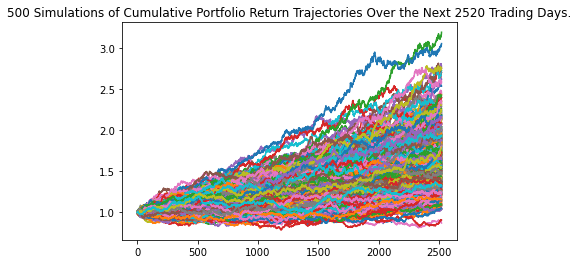

In [54]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE

#Creates an overlayed lineplot showing the 500 different potential returns gathered during our simulation
mc_portfolio_2_10_year_plot = mc_portfolio_2_10_year.plot_simulation()

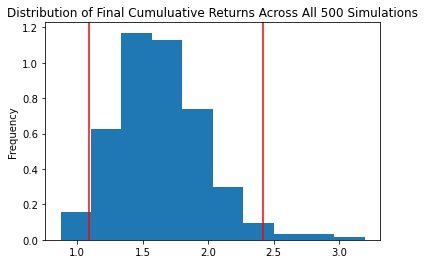

In [56]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE

#Plots a probability distribution chart of our thirty year Monte Carlo simulation
mc_portfolio_2_10_year_probability = mc_portfolio_2_10_year.plot_distribution()

In [100]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE

#Creates summary statistics for our 30 year Monte Carlo simulation
mc_portfolio_2_10_year_probability_summary = mc_portfolio_2_10_year.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
# YOUR CODE HERE

#Prints out out the 10 Year simulation Summary Statistics
print("10 Year Simulation Summary Statistics")
print("")
display(mc_portfolio_2_10_year_probability_summary)

10 Year Simulation Summary Statistics



count           500.000000
mean              1.610685
std               0.324329
min               0.908793
25%               1.360557
50%               1.588500
75%               1.804080
max               2.877979
95% CI Lower      1.100483
95% CI Upper      2.335882
Name: 2520, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [58]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE

#Prints out savings DataFrame
savings_df

,amount
crypto,56615.405
stock/bond,60689.500


In [101]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio

#Calculates the cumulative returns lower confidence interval by multiplying our stocks/bonds current amount by the 95% percent lower confidence level calculated in summary statistics
ci_lower_thirty_cumulative_return = savings_df.iloc[1]["amount"] * mc_portfolio_2_10_year_probability_summary["95% CI Lower"]

#Calculates the cumulative returns upper confidence interval by multiplying our stocks/bonds current amount by the 95% percent upper confidence level calculated in summary statistics
ci_upper_thirty_cumulative_return = savings_df.iloc[1]["amount"] * mc_portfolio_2_10_year_probability_summary["95% CI Upper"]

# Print the result of your calculations
# YOUR CODE HERE

#prints out our lower and upper 95% confidence levels
print(f"After ten years of investment we can expect the stock/bond portfolio to fall between ${ci_lower_thirty_cumulative_return:.02f} and ${ci_upper_thirty_cumulative_return:.02f} with a 95% confidence")


After ten years of investment we can expect the stock/bond portfolio to fall between $66787.75 and $141763.49 with a 95% confidence


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?